In [9]:
import pandas as pd
import os

# We use '../' to go up one folder from 'recsys' to 'PREDICTION MODEL'
# Then we enter 'ml-32m\ml-32m'
ratings_path = r'../ml-32m\ml-32m/ratings.csv'
movies_path = r'../ml-32m\ml-32m/movies.csv'

print(f"Checking path: {os.path.abspath(ratings_path)}")

try:
    ratings = pd.read_csv(ratings_path, nrows=100000)
    movies = pd.read_csv(movies_path)
    print("Success! Data loaded.")
    display(ratings.head())
except FileNotFoundError:
    print("Still can't find it. Let's list everything in the parent folder:")
    print(os.listdir('..'))

Checking path: c:\Users\surya\OneDrive\Desktop\Prediction Model\ml-32m\ml-32m\ratings.csv
Success! Data loaded.


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [10]:
# Merge the ratings and movies dataframes
# This adds titles and genres to our ratings table
data = pd.merge(ratings, movies, on='movieId')

# Display the first 5 rows of the combined data
print("Merged Data Preview:")
display(data.head())

Merged Data Preview:


,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [11]:
# Group by title and count how many ratings each movie got
popular_movies = data.groupby('title')['rating'].count().sort_values(ascending=False)
print("Top 10 Most Rated Movies:")
print(popular_movies.head(10))

Top 10 Most Rated Movies:
title
Shawshank Redemption, The (1994)                             319
Forrest Gump (1994)                                          316
Matrix, The (1999)                                           296
Pulp Fiction (1994)                                          295
Silence of the Lambs, The (1991)                             273
Star Wars: Episode IV - A New Hope (1977)                    270
Lord of the Rings: The Fellowship of the Ring, The (2001)    246
Fight Club (1999)                                            236
Jurassic Park (1993)                                         228
Star Wars: Episode V - The Empire Strikes Back (1980)        228
Name: rating, dtype: int64


In [12]:
# Group by title and find the mean rating
average_ratings = data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\nHighest Rated Movies (Average):")
print(average_ratings.head(10))


Highest Rated Movies (Average):
title
Let Sleeping Corpses Lie (Non si deve profanare il sonno dei morti) (1974)    5.0
[REC]³ 3 Génesis (2012)                                                       5.0
Beastie Boys: Sabotage (1994)                                                 5.0
Thumbelina (1994)                                                             5.0
Three Musketeers, The (1973)                                                  5.0
Big Bad Wolves (2013)                                                         5.0
Beyond the Mat (1999)                                                         5.0
Things Change (1988)                                                          5.0
Bill Burr: Paper Tiger (2019)                                                 5.0
Bill Burr: Let It Go (2010)                                                   5.0
Name: rating, dtype: float64


<Axes: title={'center': 'Distribution of Ratings'}, xlabel='rating'>

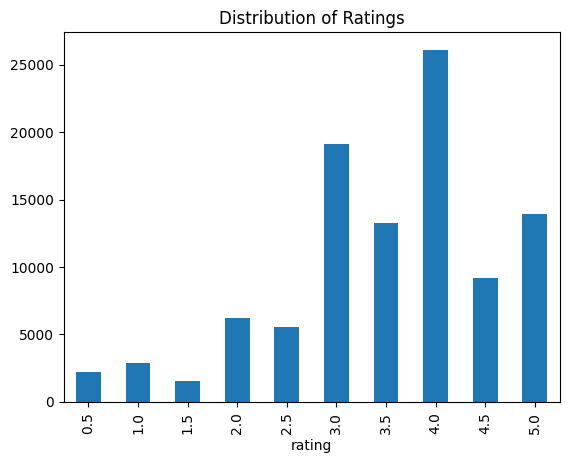

In [13]:
# This shows us if users are generally "nice" or "harsh" with their scores
data['rating'].value_counts().sort_index().plot(kind='bar', title='Distribution of Ratings')

In [17]:
# Lowering 'm' because we are only looking at a small 100k row sample
C = movie_stats['avg_rating'].mean() 
m = 50  # Changed from 500 to 50 for this small sample

# Re-run the qualification
qualified_movies = movie_stats[movie_stats['vote_count'] >= m].copy()

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['avg_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)
top_recommendations = qualified_movies.sort_values('score', ascending=False)

display(top_recommendations.head(10))

,avg_rating,vote_count,score
title,,,
"Shawshank Redemption, The (1994)",4.385580,319,4.236659
Schindler's List (1993),4.291667,216,4.102734
"Godfather, The (1972)",4.291080,213,4.100104
Fight Club (1999),4.239407,236,4.072823
Pulp Fiction (1994),4.132203,295,4.009644
"Matrix, The (1999)",4.119932,296,3.999501
Inception (2010),4.186842,190,3.999281
"Usual Suspects, The (1995)",4.151515,198,3.977126
American Beauty (1999),4.114865,222,3.962600


In [4]:
# Filter original data for Comedy, then get their titles
comedy_movies = data[data['genres'].str.contains('Comedy')]['title'].unique()

# Show the top qualified movies that are also in the 'Comedy' list
top_comedy = top_recommendations[top_recommendations.index.isin(comedy_movies)]
display(top_comedy.head(10))

NameError: name 'data' is not defined

NameError: name 'movie_stats' is not defined